**Subject: Sorting algorithms**

# Ex.I 
## I.1.
**Compare the speed of 4 sorting methods: BS, HS, CS, ShS for the array of
integers randomly generated according to the uniform probability distribution.
Submit a chart t=f(n) where: t - sorting time; n - number of elements of the
sequence. The number of elements must be selected in such a way that
measurements can be taken properly. The results are presented in one chart (at
least 15 measuring points).**


In [0]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.setrecursionlimit(10**7)

## Sorting metod's (Bouble sort, Shell sort, Heap sort, Counting sort)

Bouble sort

In [0]:
def boubleSort(data):
    sortedList =data.copy()
    t0 = time.time()
    update = True
    length = len(sortedList)
    while (update == True and length > 1):
        update = False
        for i in range(len(sortedList) - 1):
            if sortedList[i] > sortedList[i + 1]:
                sortedList[i], sortedList[i + 1] = sortedList[i + 1], sortedList[i]
                update = True
        length -= 1
    t1 = time.time()
    timeTab[0].append((t1 - t0))
    return sortedList

 Shell sort

In [0]:
def shellSort(data):

   
    t0 = time.time()
    point = len(data) // 2

    while point > 0:
        for i in range(point, len(data)):
            box = data[i]
            j = i
            while j >= point and data[j - point] > box:
                data[j] = data[j - point]
                j -= point

            data[j] = box
        point //= 2
    t1 = time.time()
    timeTab[1].append((t1-t0))
    sortedlist = data
    return sortedlist

Heap sort

In [0]:
def heapSort(data):
    sortedList = data.copy()
    t0 = time.time()
    def swap(a, i, j):
        sortedList[i],sortedList[j] = sortedList[j],sortedList[i]

    def siftdown(sortedList, i, size):
        l = 2 * i + 1
        r = 2 * i + 2
        largest = i
        if l <= size - 1 and sortedList[l] > sortedList[i]:
            largest = l
        if r <= size - 1 and sortedList[r] > sortedList[largest]:
            largest = r
        if largest != i:
            swap(sortedList, i, largest)
            siftdown(sortedList, largest, size)

    def heapify(sortedList, size):
        p = (size // 2) - 1
        while p >= 0:
            siftdown(sortedList, p, size)
            p -= 1

    size = len(sortedList)
    heapify(sortedList, size)
    end = size - 1
    while (end > 0):
        swap(sortedList, 0, end)
        siftdown(sortedList, 0, end)
        end -= 1
    t1 = time.time()
    timeTab[2].append((t1-t0))
    return sortedList

Counting sort

In [0]:
def countingSort(data):
    t0 = time.time()
    high = max(data)
    tempLs = [0 for x in range(high + 1)]
    sortedList = [0 for i in range(len(data))]

    for items in data:
        tempLs[items] += 1

    for i in range(1, len(tempLs)):
        tempLs[i] += tempLs[i - 1]

    i = len(data) - 1
    while i >= 0:
        sortedList[tempLs[data[i]] - 1] = data[i]
        tempLs[data[i]] -= 1
        i -= 1

    t1 = time.time()
    timeTab[3].append((t1-t0))
    return sortedList

## Validation of sorting methods

In [0]:
tempdata = [random.randint(0, 100) for i in range(0,20)]
print(boubleSort(tempdata))
print(heapSort(tempdata))
print(countingSort(tempdata))
print(shellSort(tempdata))
print(tempdata)

[12, 15, 18, 19, 36, 38, 43, 46, 53, 57, 70, 72, 74, 78, 79, 80, 82, 87, 88, 90]
[12, 15, 18, 19, 36, 38, 43, 46, 53, 57, 70, 72, 74, 78, 79, 80, 82, 87, 88, 90]
[12, 15, 18, 19, 36, 38, 43, 46, 53, 57, 70, 72, 74, 78, 79, 80, 82, 87, 88, 90]
[12, 15, 18, 19, 36, 38, 43, 46, 53, 57, 70, 72, 74, 78, 79, 80, 82, 87, 88, 90]
[12, 15, 18, 19, 36, 38, 43, 46, 53, 57, 70, 72, 74, 78, 79, 80, 82, 87, 88, 90]


Enter the number of measuring points: 

In [0]:
N = int(input("Enter the number of measuring points: "))

Enter the number of measuring points: 20


## Creaiting results:

In [0]:
timeTab = [[], [], [], []]
nnumbers = []
positions = [i for i in range(N)]
positions1 = [x + 0.25 for x in positions]
positions2 = [x + 0.25 for x in positions1]
positions3 = [x + 0.25 for x in positions2]

for i in range(1, N+1):
    data = [random.randint(0, 1000) for i in range(i*100)]
    countingSort(data)
    heapSort(data)
    boubleSort(data)
    shellSort(data)
    nnumbers.append((i*100))
labelPosition = [x - 0.125 for x in positions2]

## Creaiting plots:

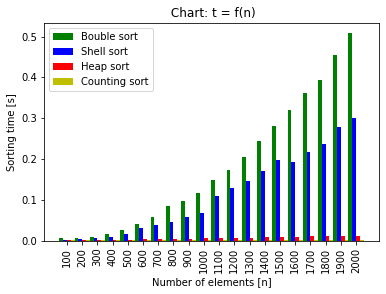

In [0]:
legend = ['Bouble sort','Shell sort','Heap sort','Counting sort']
plt.bar(positions,timeTab[0],width=0.25, color="g")
plt.bar(positions1,timeTab[1],width=0.25, color="b")
plt.bar(positions2,timeTab[2],width=0.25, color="r")
plt.bar(positions3,timeTab[3],width=0.25, color="y")
plt.xticks(labelPosition,nnumbers)
plt.xticks(rotation=90)
plt.title(" Chart: t = f(n)")
plt.xlabel('Number of elements [n]')
plt.ylabel('Sorting time [s]')
plt.legend(legend)
plt.show()

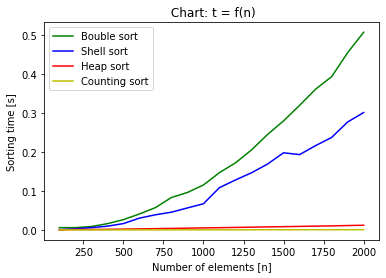

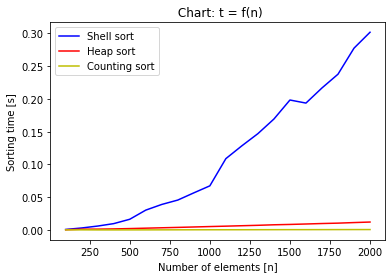

In [0]:
plt.plot(nnumbers,timeTab[0],'g',nnumbers,timeTab[1],'b',nnumbers,timeTab[2],'r',nnumbers,timeTab[3],'y')
plt.title(" Chart: t = f(n)")
plt.xlabel('Number of elements [n]')
plt.ylabel('Sorting time [s]')
plt.legend(legend)
plt.show()

plt.plot(nnumbers,timeTab[1],'b',nnumbers,timeTab[2],'r',nnumbers,timeTab[3],'y')
plt.title(" Chart: t = f(n)")
plt.xlabel('Number of elements [n]')
plt.ylabel('Sorting time [s]')
legend = ['Shell sort','Heap sort','Counting sort']
plt.legend(legend)
plt.show()

## I.2.
**Formulate conclusions on the computational complexity of the methods studied and their relationship with the efficiency of sorting and the memory activities of each method.**

By analyzing the generated charts, you can easily notice that 'Bouble sort' has the longest sorting time, which corresponds to theoretical assumptions (average compression: n ^ 2). 'Shell sort' has the second worst executing time, which is significantly different form the others time's. 'Heap sort' as well as 'Counting sort' have the best and similar results with small advantage of 'Counting sort' but if we are using 'Counting sort' we need to alocate memmory not in place. To sum up if we compare methods by executing time, the best choice is 'Counting sort' but if we need to allocate mmemory in place we should use 'Heap sort' or 'Shell sort'. 

*   Counting Sort time: O(n+k) memory: O(n+k)

*   Bubble Sort time: O(n^2) memory: O(n)
*   Heap Sort time: O(nlogn) memory: O(n)


*   Shell Sort time: O(n^1.25) memory: O(n)

  

# Ex.II.
## II.1.
**For different input types compare the effectiveness of 3 sorting algorithms.
a)QS with middle selected pivot, b) HS and c) MS. Examine the performance for
the following data types of the sequence:**
- random (uniform distribution)
- constant value (e.g.equal to 0)
- increasing order (step equal to 1)
- descending order (step equal to 1)
- ascending-descending order (A shape – increase odd numbers - decrease even)
- descending-ascending order (V -shape – decrease odd numbers - increase even)

## Some data type's:

In [0]:
def randomdata(length):
    return [random.randint(0, 1000) for i in range(length)]


def constdata(length):
    return [0 for i in range(length)]


def increasedata(length):
    return [i for i in range(length)]


def decreasingdata(length):
    return [i for i in range((length), 0, -1)]


def ashapedata(length):
    return [i for i in range(1, (length // 2), +2)] + [i for i in range((length // 2), -1, -2)]


def vshapedata(length):
    return [i for i in range((length // 2) - 1, 0, -2)] + [i for i in range(0, (length // 2) + 1, 2)]


## Sorting method's:

Merge sort

In [0]:
def mergeSort(data):
    sortList = data.copy()
    t0 = time.time()

    def mSort(sortList):
        if len(sortList) > 1:
            mid = len(sortList) // 2
            lefthalf = sortList[:mid]
            righthalf = sortList[mid:]

            mSort(lefthalf)
            mSort(righthalf)

            i = 0
            j = 0
            k = 0
            while i < len(lefthalf) and j < len(righthalf):
                if lefthalf[i] < righthalf[j]:
                    sortList[k] = lefthalf[i]
                    i = i + 1
                else:
                    sortList[k] = righthalf[j]
                    j = j + 1
                k = k + 1

            while i < len(lefthalf):
                sortList[k] = lefthalf[i]
                i = i + 1
                k = k + 1

            while j < len(righthalf):
                sortList[k] = righthalf[j]
                j = j + 1
                k = k + 1

    t1 = time.time()
    mSort(sortList)

    return (t1 - t0)


Quick sort

In [0]:
def quickSort(data):
    t0 = time.time()
    def qsort(lst):
        l = len(lst)

        if l <= 1: return lst
        else:
            pivot = [lst[l // 2]]
            del lst[l // 2]
            return qsort([elem for elem in lst if elem < pivot[0]]) + pivot + qsort([elem for elem in lst if elem >= pivot[0]])

    qsort(data)
    t1 = time.time()

    return (t1 - t0)

Heap sort

In [0]:
def heapSort(data):
    sortedList = data.copy()
    t0 = time.time()

    def swap(a, i, j):
        tmp = sortedList[i]
        sortedList[i] = sortedList[j]
        sortedList[j] = tmp

    def siftdown(sortedList, i, size):
        l = 2 * i + 1
        r = 2 * i + 2
        largest = i
        if l <= size - 1 and sortedList[l] > sortedList[i]:
            largest = l
        if r <= size - 1 and sortedList[r] > sortedList[largest]:
            largest = r
        if largest != i:
            swap(sortedList, i, largest)
            siftdown(sortedList, largest, size)

    def heapify(sortedList, size):
        p = (size // 2) - 1
        while p >= 0:
            siftdown(sortedList, p, size)
            p -= 1

    size = len(sortedList)
    heapify(sortedList, size)
    end = size - 1
    while (end > 0):
        swap(sortedList, 0, end)
        siftdown(sortedList, 0, end)
        end -= 1

    t1 = time.time()

    return (t1 - t0)


## Creaiting results:

In [0]:
def creatingTimeTab(data):
    timeTab = [[] for i in range(6)]
    algth = [quickSort,heapSort,mergeSort]
    n = 0
    for k in algth:
        for datatype in data:
            for i in range(100, 2000, 100):
                average = []
                for v in range(10):
                    average.append(k(datatype(i)))
                timeTab[n].append(np.mean(average))
            n += 1
    return timeTab

## Creaiting plots:

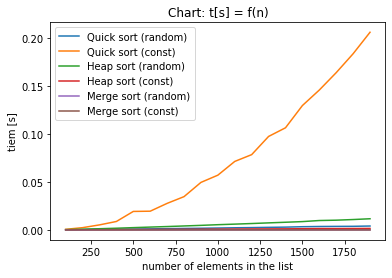

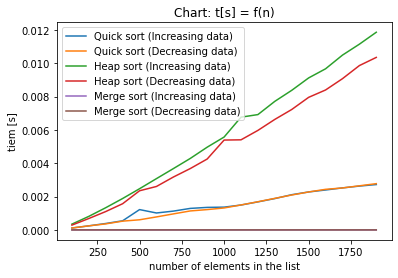

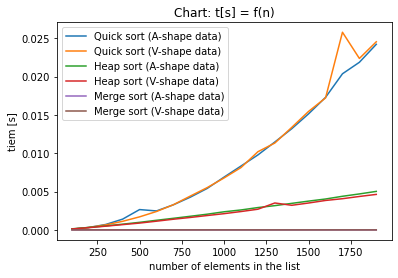

In [0]:
timeTab = creatingTimeTab([randomdata,constdata])
for i in timeTab:
    plt.plot([i for i in range(100, 2000, 100)],list(i))
plt.xlabel("number of elements in the list")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n)")
plt.legend(['Quick sort (random)','Quick sort (const)','Heap sort (random)','Heap sort (const)','Merge sort (random)','Merge sort (const)'])
plt.show()

timeTab = creatingTimeTab([increasedata,decreasingdata])
for i in timeTab:
    plt.plot([i for i in range(100, 2000, 100)],list(i))
plt.xlabel("number of elements in the list")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n)")
plt.legend(['Quick sort (Increasing data)','Quick sort (Decreasing data)','Heap sort (Increasing data)','Heap sort (Decreasing data)','Merge sort (Increasing data)','Merge sort (Decreasing data)'])
plt.show()

timeTab = creatingTimeTab([ashapedata,vshapedata])
for i in timeTab:
    plt.plot([i for i in range(100, 2000, 100)],list(i))
plt.xlabel("number of elements in the list")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n)")
plt.legend(['Quick sort (A-shape data)','Quick sort (V-shape data)','Heap sort (A-shape data)','Heap sort (V-shape data)','Merge sort (A-shape data)','Merge sort (V-shape data)'])
plt.show()

## II.2.
**Draw conclusions on the computational complexity and computational efficiency
of QS execution and the behavior of the algorithm in the worst case scenario and
for the different types of data. What is the median effect on QS sorting time? What
is it used for?**

'Quick sort' is definitely on of the most using sorting allgorithm, because is easy in inmplamatation and give good results. One of the best time executing in random genereted data and good scores in other data types but not with 'const data'.

QS with middle selected pivot assigns elements to only one group, as a result, it reaches the complexity of O (n ^ 2).

QS has also problems with V,A-shape data in compare wit others sorting methods, difrence with time sorting executing is significant.

'Quick' is not stable like 'Heap sort' so unsuitable to use in data where the priority/order of elements is significant. 

Whereas for 'Heap sort' the longes time to sort are for increasing/decreasing data format, because for this format data we need to make a new 'Heap' for evry binnary tree what  causes longer executing.

'Merge sort' is one of the most efficient sorting algorithms. 'MS' has the best average sreult of all of data types.

## Quick sort plot

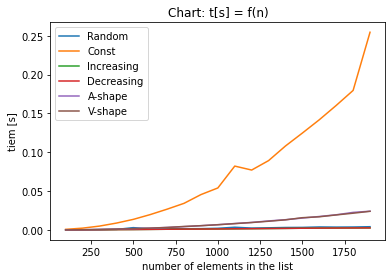

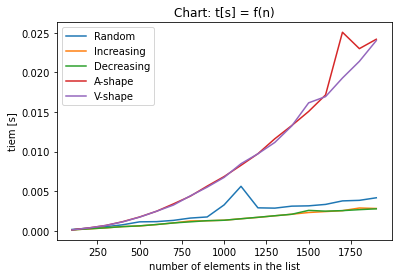

In [0]:
timeTab = [[] for i in range(6)]
data = [randomdata, constdata, increasedata, decreasingdata, ashapedata, vshapedata]
for k,datatype in enumerate(data):
    for j in range(100,2000,100):
        timeTab[k].append(quickSort(datatype(j)))

for i in timeTab:
    plt.plot([i for i in range(100, 2000, 100)], i)
plt.legend(['Random','Const','Increasing','Decreasing','A-shape','V-shape'])
plt.xlabel("number of elements in the list")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n)")
plt.show()


timeTab = [[] for i in range(5)]
data = [randomdata, increasedata, decreasingdata, ashapedata, vshapedata]
for k,datatype in enumerate(data):
    for j in range(100,2000,100):
        timeTab[k].append(quickSort(datatype(j)))

for i in timeTab:
    plt.plot([i for i in range(100, 2000, 100)], i)
plt.legend(['Random','Increasing','Decreasing','A-shape','V-shape'])
plt.xlabel("number of elements in the list")
plt.ylabel("tiem [s]")
plt.title("Chart: t[s] = f(n)")
plt.show()



On the above graphs we can easily see which data format is easiest for 'Quick sort'.



*  Quick Sort time: O(nlog(n)) memory: O(n)

*   Heap Sort time: O(nlog(n)) memory: O(n)
*   Merge Sort time: O(nlog(n)) memory: O(n)



Created by: 
Bartosz Maślanka 144091